In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tqdm

In [2]:
def f(x):
    return x**3 - 1

Корни:

$$
-\frac{1}{2} + \frac{\sqrt{3}i}{2}, \\
-\frac{1}{2} - \frac{\sqrt{3}i}{2}, \\
1
$$

In [3]:
def f_diff(x):
    return 3 * x ** 2

In [4]:
def Newton(f, f_diffirench, x_0, epsilon=1e-15):
    it_count = 0
    x_1 = x_0
    while abs(f(x_1)) > epsilon:
        it_count += 1
        x_0 = x_1
        if f_diffirench(x_0) != 0:
            x_1 = x_0 - f(x_0) / f_diffirench(x_0)
        
    return x_1, it_count

In [5]:
root1 = 1
root2 = complex(-0.5, np.sqrt(3)/2)
root3 = complex(-0.5, -np.sqrt(3)/2)

In [6]:
x_lin = np.linspace(-2, 2, 200)
y_lin = np.linspace(-2j, 2j, 200)

In [7]:
points = []
for x in x_lin:
    for y in y_lin:
        points.append((x, y))

points = np.array(points)

In [8]:
roots = np.zeros(len(points), dtype=np.complex128)
it = np.zeros(len(points))

In [9]:
for i, (x, y) in enumerate(points):
    root, it_count = Newton(f, f_diff, x + y)
    roots[i] = root
    it[i] = it_count

100%|██████████████████████████████████| 40000/40000 [00:01<00:00, 33063.15it/s]


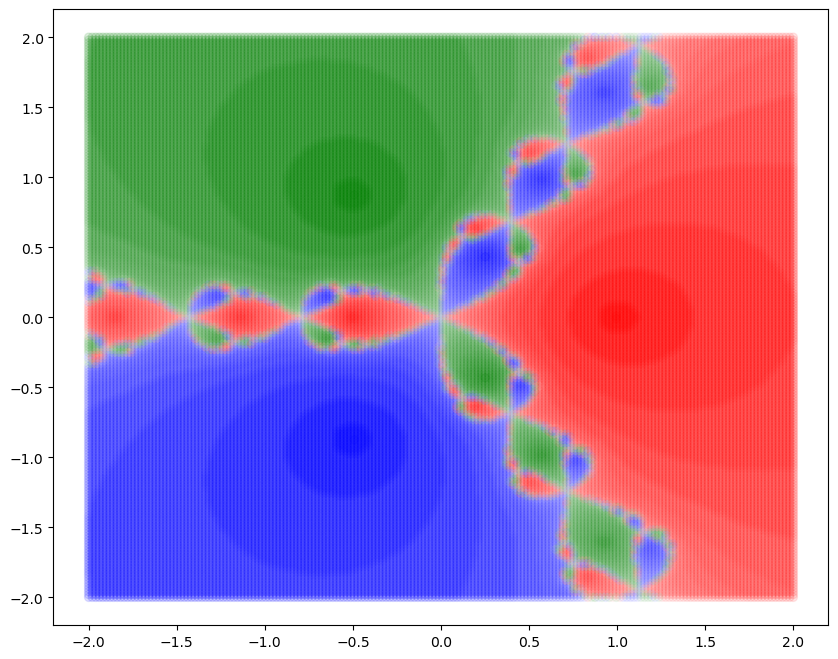

In [10]:
plt.figure(figsize=(10, 8))

root_index = np.zeros(len(roots), dtype="str")
intensity = np.zeros(len(roots))

for i in tqdm.tqdm(range(len(roots))):

    if np.isclose(roots[i], root1):
        root_index[i] = "red"
    elif np.isclose(roots[i], root2):
        root_index[i] = "green"
    elif np.isclose(roots[i], root3):
        root_index[i] = "blue"
        
    intensity[i] = 1 / it[i]
     
plt.scatter(np.real(points[::, 0]), (np.imag(points[::, 1])), color=root_index, alpha=intensity * 0.9)


plt.show()
